In [8]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import tensorflow as tf

#pip install tensorflow

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

#pip install  keract
from keract import get_activations, display_activations



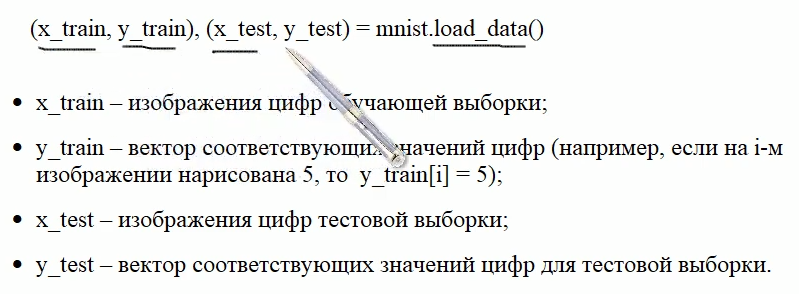

In [11]:
# load_data() - метод для загрузки выборки
# каждое изображение имеет размер 28х28 и представлено в градациях серого: 0 - черный, 255 -белый

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных - чтобы значение оттенка были от 0 до 1
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10) #встроенная функция перевода результата из вида 0,0,0,1,0 ... в обычную цифру
y_test_cat = keras.utils.to_categorical(y_test, 10)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

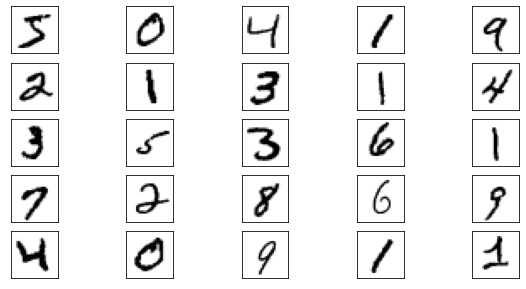

In [13]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10, 5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary) # cmap - задаем палитру. cm.binary - ч.б

plt.show()

In [ ]:
# Создаем многослойную сеть
tf.random.set_seed(1234)  # applied to achieve consistent results

model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1), name = 'layer1') ,# Слой Flatten преобразует матрицу 28х28 в одномерный вектор. "1" - это значит 1 байт, дающий градации серого от 0 до 255
    Dense(128, activation='relu', name = 'layer2'), # Слой Dense - полносвязный слой (все со всеми)
    Dense(10, activation='softmax', name = 'layer3') # Выходной слой softmax - тк хотим интерпретировать в виде вероятности
])


In [ ]:
# (784+1) * 128  - число входов + 1 байес умножить на 128 скрытых нейронов, т.е. по сути число связей
# (128+1) * 10 128 скрытых нейронов + 1 байес умножить на 10 выходных нейронов

In [ ]:
# Выводим параметры сети (слои и тд)
print(model.summary())      # вывод структуры НС в консоль (саммари модели)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam', # оптимизатор
             loss='categorical_crossentropy', # функция потерь. для задач классификации лучше всего подходит categorical_crossentropy
             metrics=['accuracy'])  # метрика. % правильно распознанных цифр


model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)
    
model.evaluate(x_test, y_test_cat)

n = 1
x = np.expand_dims(x_test[n], axis=0) # создаем 3х мерный тензор
res = model.predict(x)
print( res )

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2916 - accuracy: 0.9160 - val_loss: 0.1567 - val_accuracy: 0.9560
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1287 - accuracy: 0.9615 - val_loss: 0.1165 - val_accuracy: 0.9656
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0884 - accuracy: 0.9732 - val_loss: 0.1071 - val_accuracy: 0.9663
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0665 - accuracy: 0.9797 - val_loss: 0.1034 - val_accuracy: 0.9693
Epoch 5/5
1/1 [==============================] - 0s 48ms/step
[[6.4871280e-08 1.0050888e-04 9.9986506e-01 7.4256616e-07 1.0716895e-13
  6.5364020e-07 9.6441590e-07 4.2774369e-12 3.1885269e-05 5.9943842e-12]]


In [ ]:
print( np.argmax(res) ) # argmax - выдает максимальное значение

2


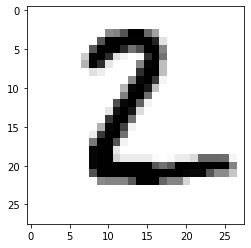

In [ ]:
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [ ]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

313/313 [==============================] - 1s 2ms/step
(10000,)


In [ ]:
# Предсказанные моделью цифры
print(pred[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [ ]:
# Фактические цифры
print(y_test[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [ ]:

# Выделение неверных вариантов
mask = pred == y_test
print(mask[:30])


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [ ]:
W1 = model.get_layer("layer1").get_weights()
W2 = model.get_layer("layer2").get_weights()
W3 = model.get_layer("layer3").get_weights()
print(f"W1\n", W1)
print(f"W2\n", W2)
print(f"W3\n", W3)

W1
 []
W2
 [array([[ 0.00617079, -0.02196175,  0.01324216, ..., -0.01911214,
        -0.06927511,  0.01174551],
       [ 0.04759633, -0.01022714,  0.05390363, ...,  0.01669851,
         0.0070364 ,  0.05790719],
       [ 0.05657204,  0.00297363,  0.00612177, ..., -0.01231582,
         0.06984367, -0.04089014],
       ...,
       [-0.06794132, -0.06372368,  0.0029496 , ...,  0.00749523,
        -0.07658522,  0.02944825],
       [-0.05129672,  0.04498299,  0.03941756, ..., -0.05557684,
         0.02027512,  0.0148161 ],
       [-0.03023826,  0.07395745, -0.01070592, ..., -0.05205283,
        -0.05643102, -0.00346854]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [ ]:

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)


(219, 28, 28)


NameError: ignored

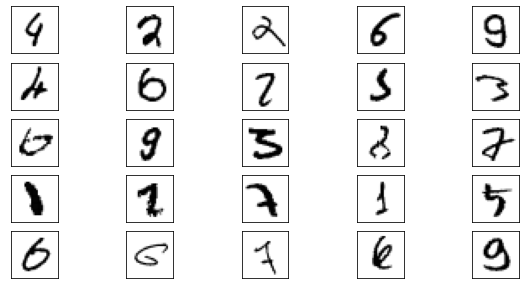

In [ ]:

# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()

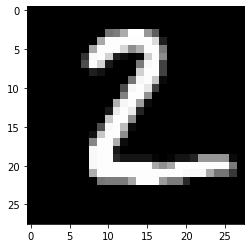

In [ ]:
k=1
plt.imshow(x_test[k], cmap="gray")
# plt.imshow(x_test[k], cmap=plt.cm.binary)
plt.show()



layer1_input (1, 28, 28) 


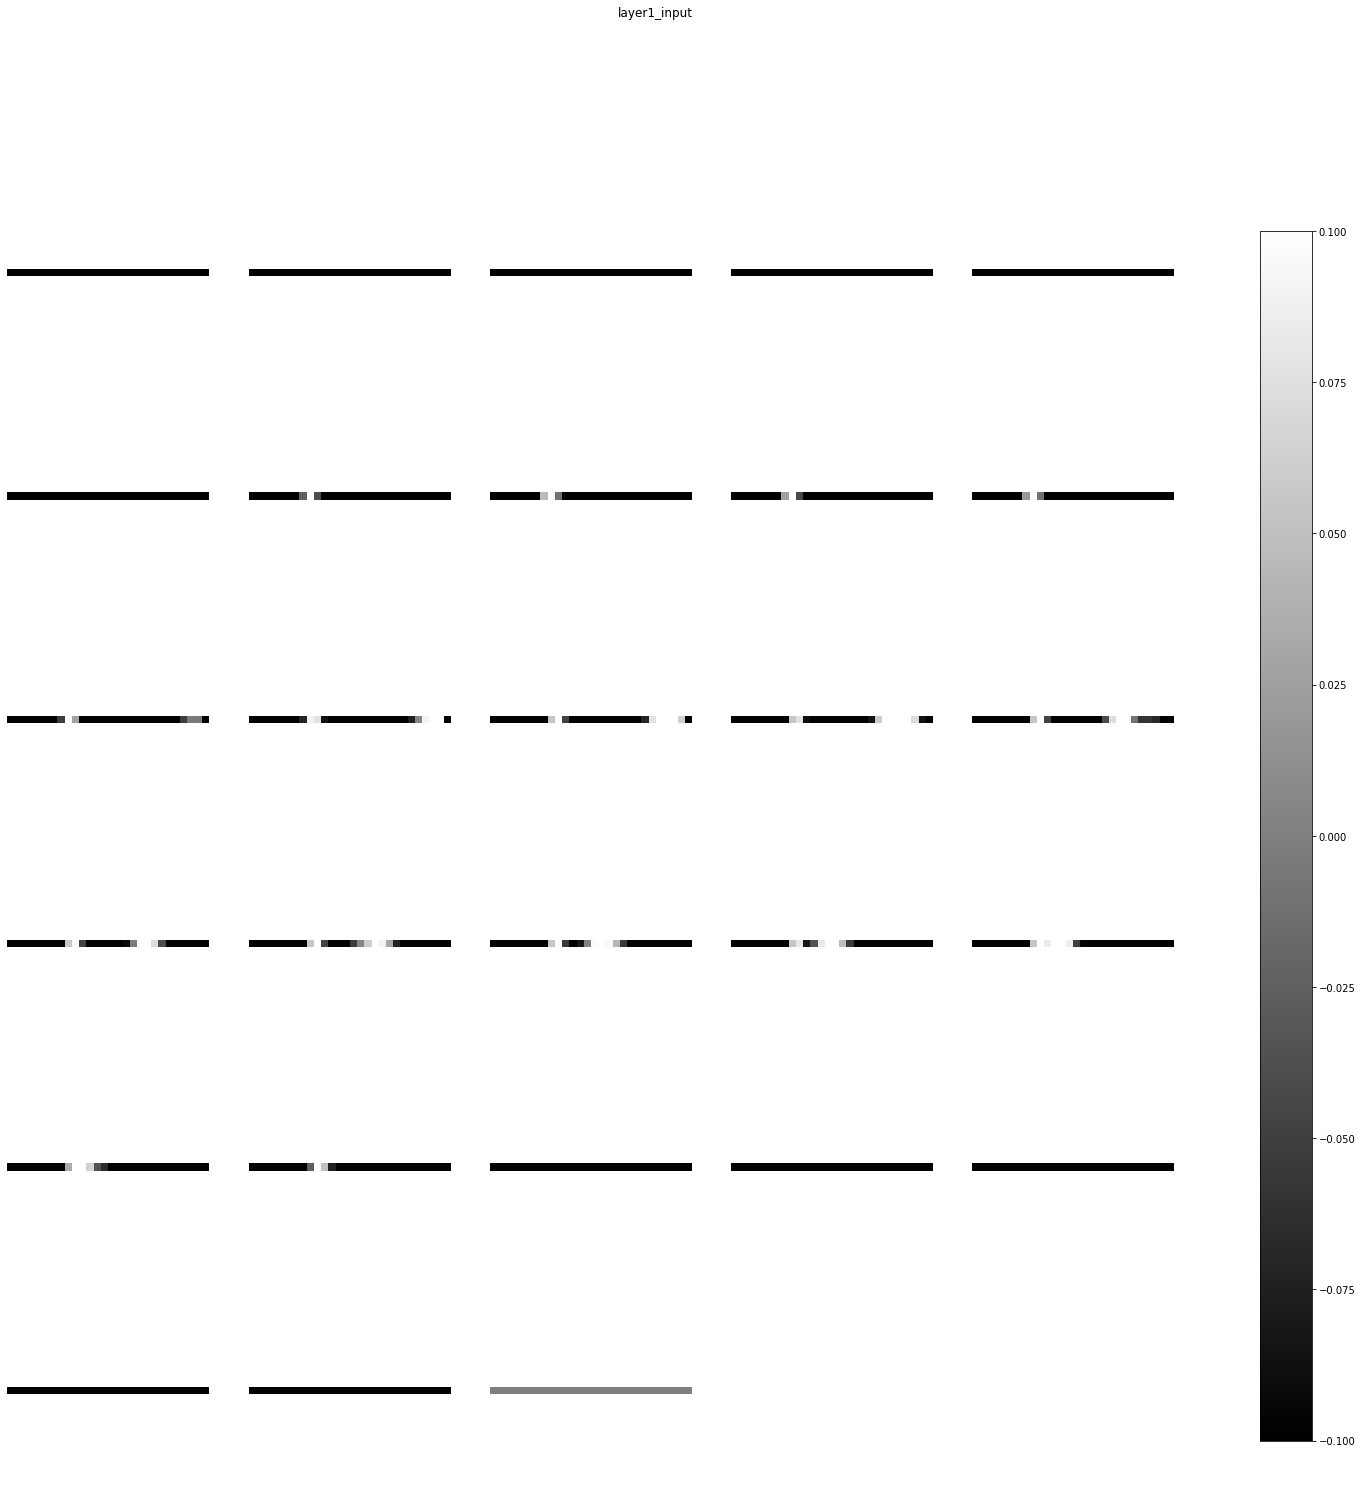

layer1 (1, 784) 


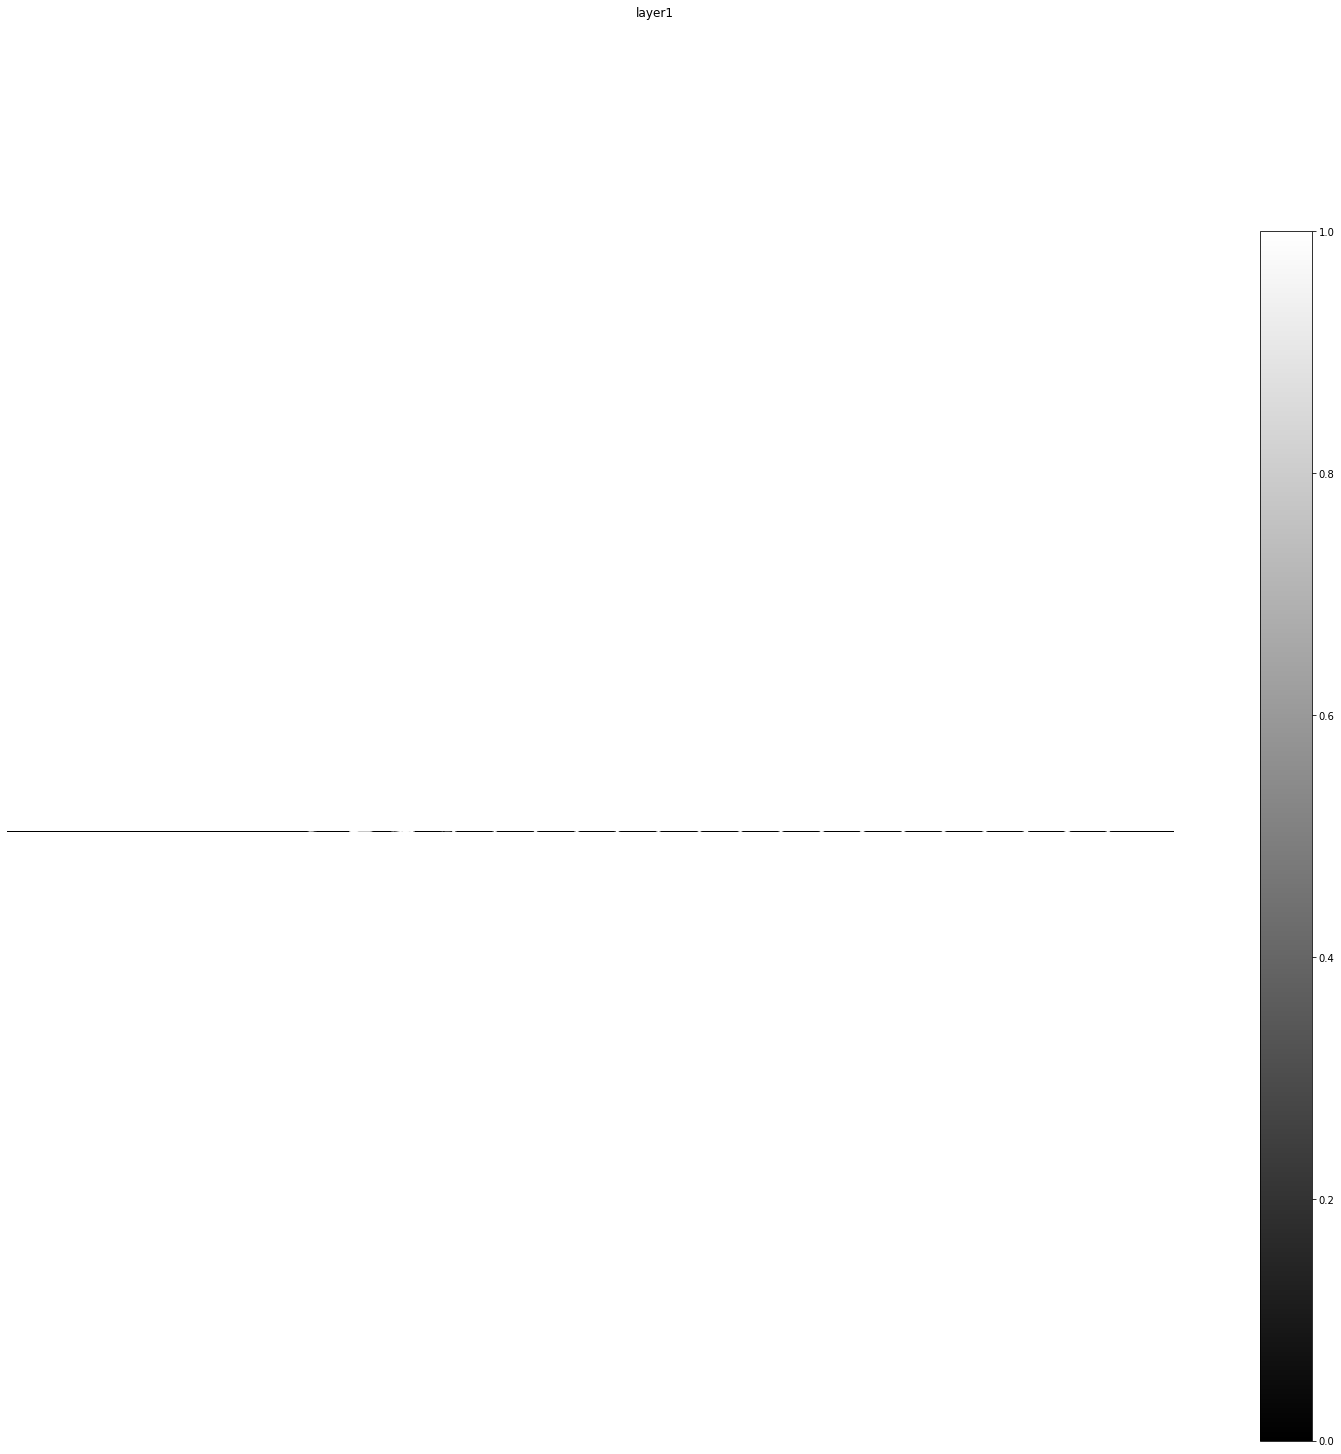

layer2 (1, 128) 


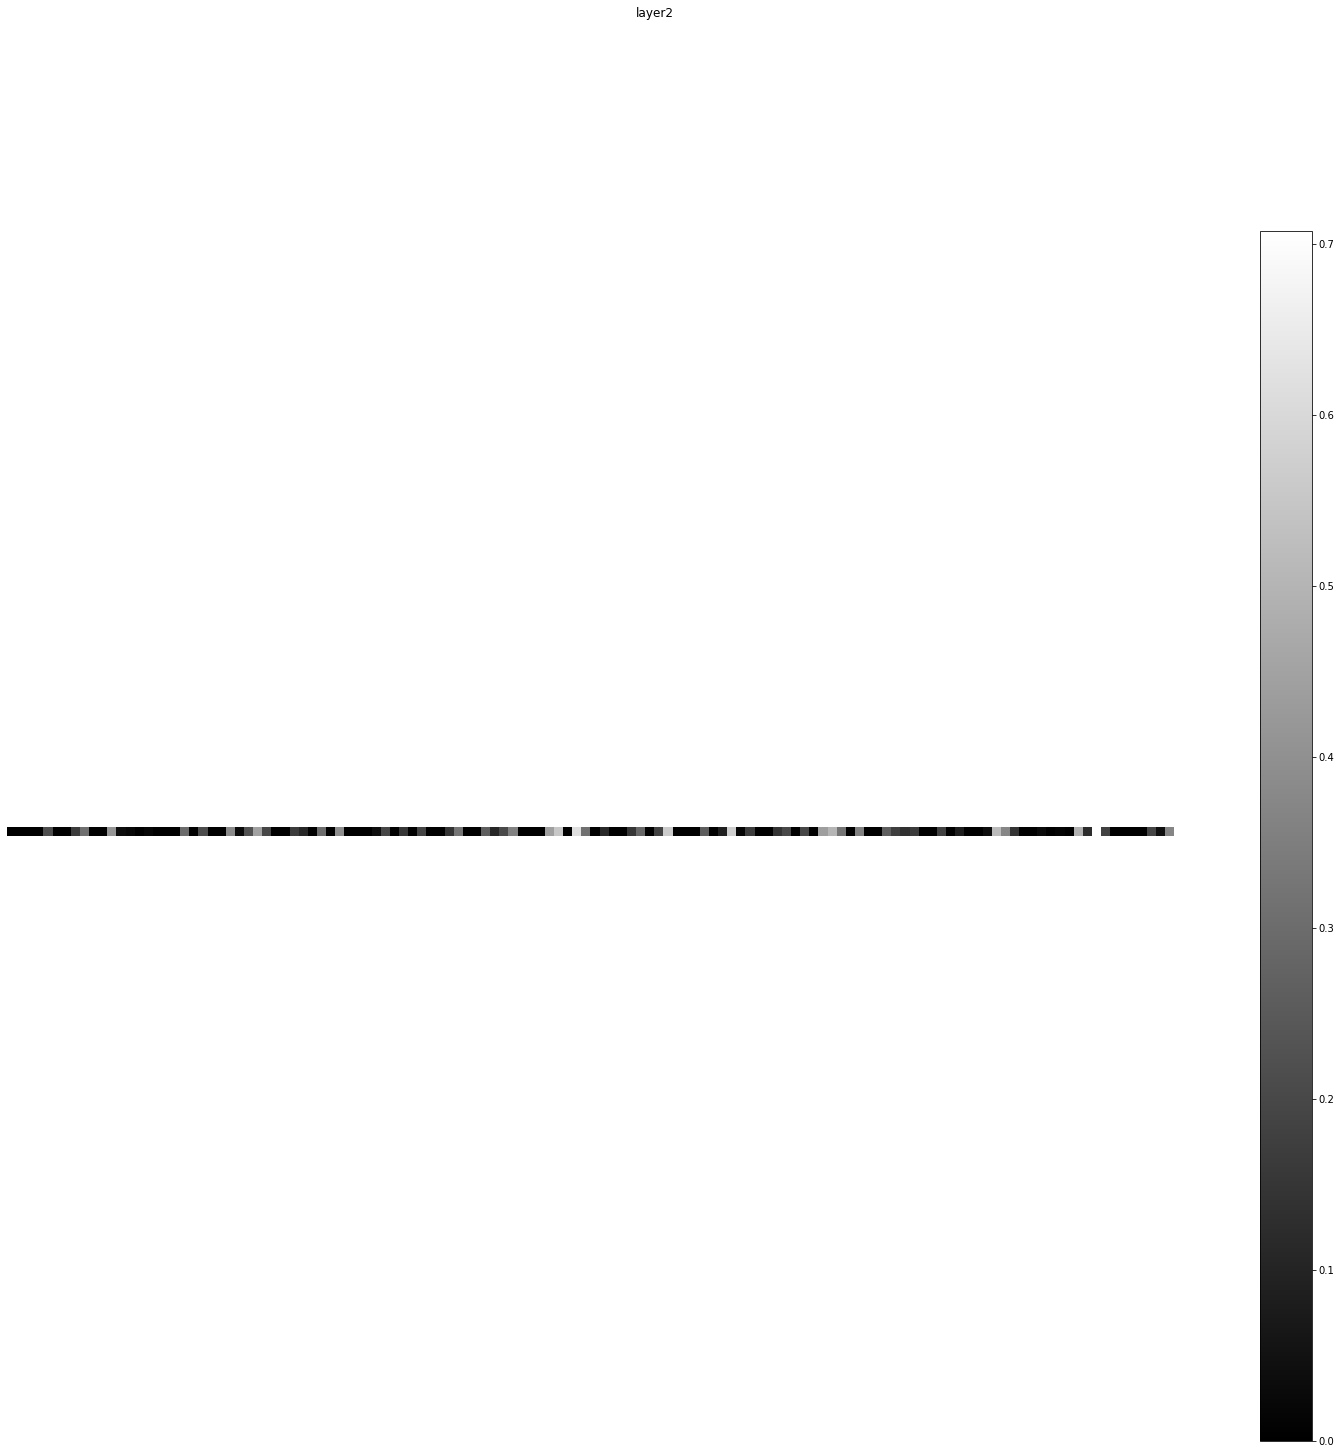

layer3 (1, 10) 


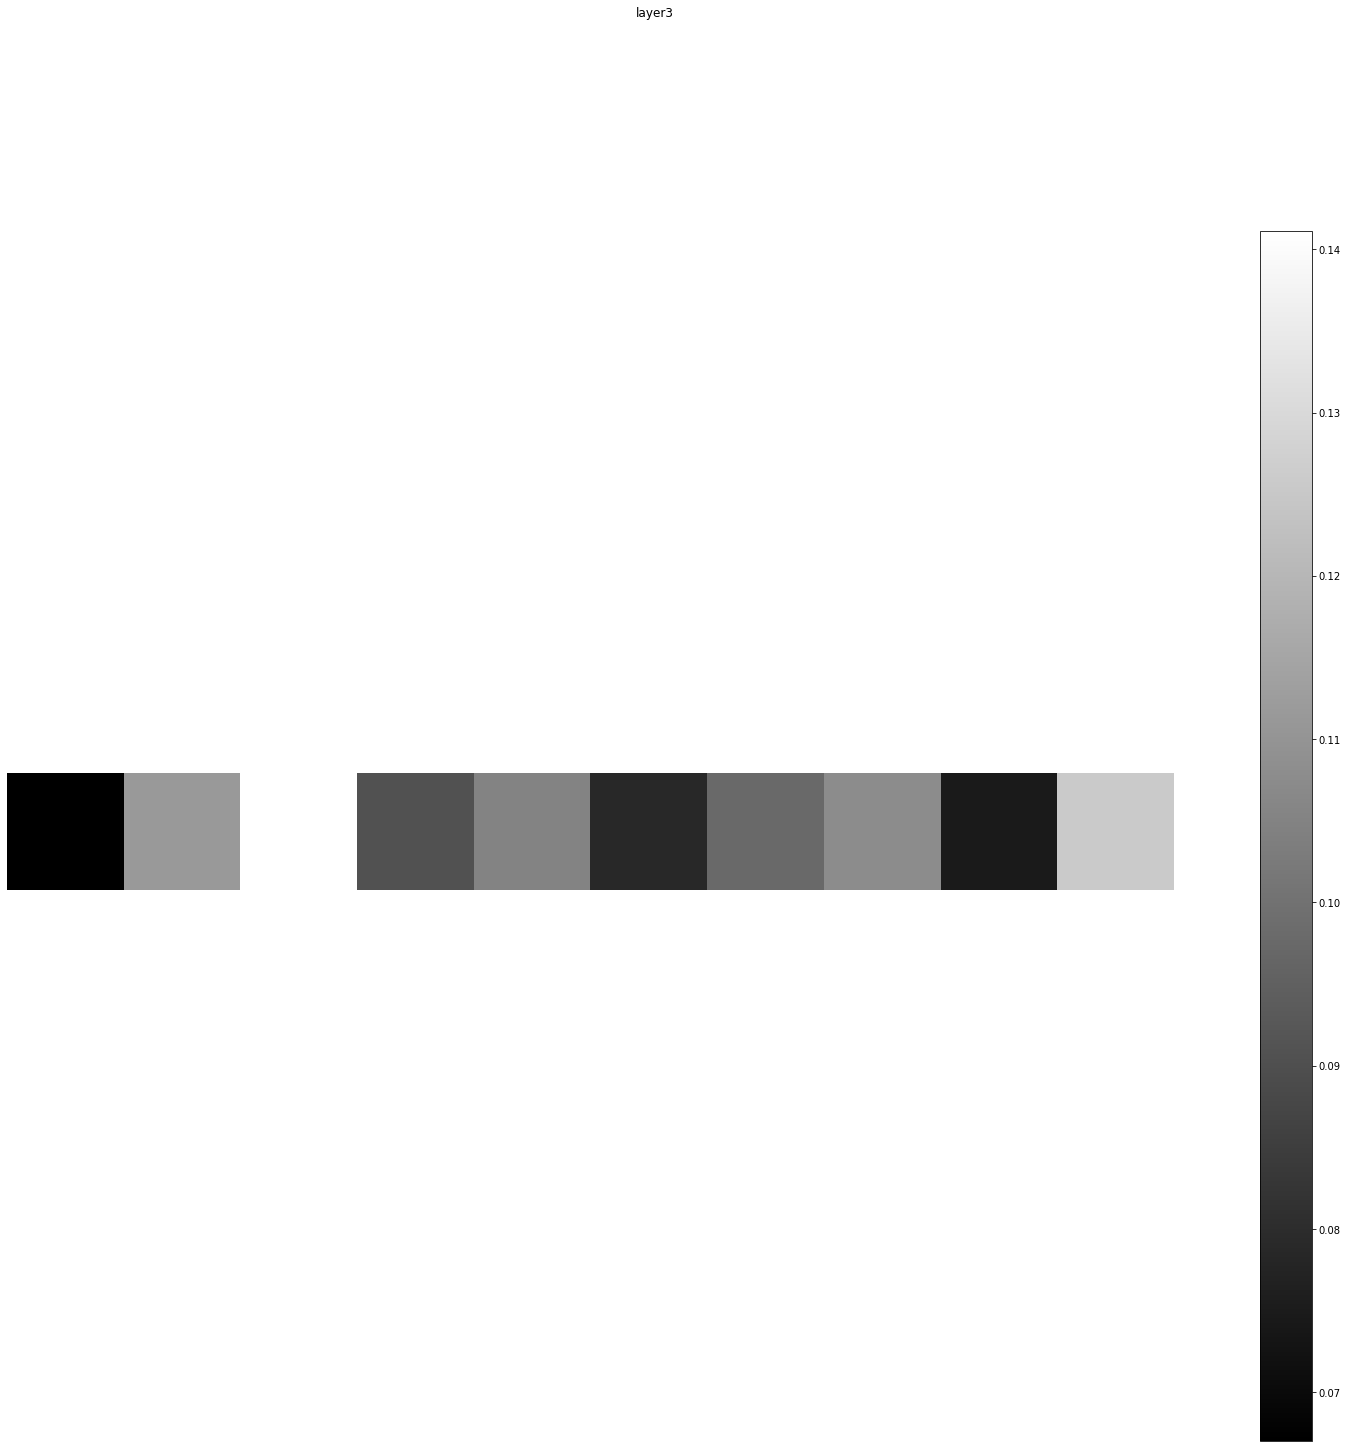

In [ ]:
# Визуализируем слои

keract_inputs = x_test[:k]
keract_targets = y_test[:k]
activations = get_activations(model, keract_inputs)
display_activations(activations, cmap="gray", save=False)
display_activations(activations, save=False, cmap="gray" )